***Problem Statement***:

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

In [2]:
#Import all the needed libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load the dataset and check for the top 5 rows
ds = pd.read_csv("loan - original.csv")

In [4]:
ds.shape

(39717, 111)

In [5]:
#Drop all the columns that contains only NA as values
ds=ds.dropna(axis='columns',how='all')
ds.shape

(39717, 57)

In [6]:
#Check for unique values
ds.nunique(axis=0)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [7]:
#Drop all the coulmns which have only one unique value as they don't give us any info on loan can be defaulted or not
ds=ds.loc[:,ds.apply(pd.Series.nunique) != 1]

In [8]:
ds.nunique(axis=0)

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
url                        39717
desc                       26527
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
mths_since_last_delinq        95
mths_since_last_record       111
open_acc                      40
pub_rec   

In [9]:
# Drop the columns which will is of only of text type
ds.drop("url", axis=1, inplace=True)
ds.drop("desc", axis=1, inplace=True)
ds.drop("title", axis=1, inplace=True)
ds.drop("emp_title", axis=1, inplace=True)
ds.drop("zip_code", axis=1, inplace=True)
ds.drop("addr_state", axis=1, inplace=True)
#Drop the unnceseesary id values
ds.drop("member_id", axis=1, inplace=True)
ds.drop("id", axis=1, inplace=True)

In [10]:
# After Checking the number of null values.Columns mths_since_last_delinq,mths_since_last_record ,next_pymnt_d have lot of null values
#So removing them.# Remove the fields which is applicable after the loan is approved.These columns cannot decide load defaulted or not.

ds.drop("mths_since_last_delinq", axis=1, inplace=True)
ds.drop("mths_since_last_record", axis=1, inplace=True)
ds.drop("next_pymnt_d", axis=1, inplace=True)
ds.drop("total_acc", axis=1, inplace=True)
ds.drop("total_pymnt", axis=1, inplace=True)
ds.drop("total_pymnt_inv", axis=1, inplace=True)
ds.drop("total_rec_int", axis=1, inplace=True)
ds.drop("total_rec_late_fee", axis=1, inplace=True)
ds.drop("total_rec_prncp", axis=1, inplace=True)
ds.drop("last_pymnt_d", axis=1, inplace=True)
ds.drop("last_credit_pull_d", axis=1, inplace=True)
ds.drop("earliest_cr_line", axis=1, inplace=True)
ds.drop("inq_last_6mths", axis=1, inplace=True)
ds.drop("open_acc", axis=1, inplace=True)
ds.drop("pub_rec", axis=1, inplace=True)
ds.drop("revol_bal", axis=1, inplace=True)
ds.drop("out_prncp", axis=1, inplace=True)
ds.drop("recoveries", axis=1, inplace=True)
ds.drop("collection_recovery_fee", axis=1, inplace=True)
ds.drop("last_pymnt_amnt", axis=1, inplace=True)
ds.drop("revol_util", axis=1, inplace=True)
ds.drop("out_prncp_inv", axis=1, inplace=True)
ds.drop("delinq_2yrs", axis=1, inplace=True)

**Fill the null values for two columns emp_length,pub_rec_bankruptcies with default values**

In [11]:
#Fill emploment length null values as 1000 to mark is as missing and replace < 1 year             
ds.emp_length=ds.emp_length.str.replace("< 1 year", "0.5 year", regex=True)
ds['emp_length'] = ds['emp_length'].fillna('1000 years')
ds.emp_length=(ds.emp_length.str.extract('(\d+)'))
ds.emp_length=ds.emp_length.apply(pd.to_numeric)

In [12]:
ds['emp_length'].value_counts()

10      8879
0       4583
2       4388
3       4095
4       3436
5       3282
1       3240
6       2229
7       1773
8       1479
9       1258
1000    1075
Name: emp_length, dtype: int64

In [13]:
ds['pub_rec_bankruptcies'] = ds['pub_rec_bankruptcies'].fillna('NOTAVAILABLE')

In [14]:
ds['pub_rec_bankruptcies'].value_counts()

0.0             37339
1.0              1674
NOTAVAILABLE      697
2.0                 7
Name: pub_rec_bankruptcies, dtype: int64

In [15]:
ds.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

In [16]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            39717 non-null  int64  
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  dti                

In [17]:
# We are intrested only on the loans that are Fully paid and Charged off. For the loads that are current we don't whether they will be defaulted or not So removing them
ds = ds[~(ds.loan_status == "Current")]

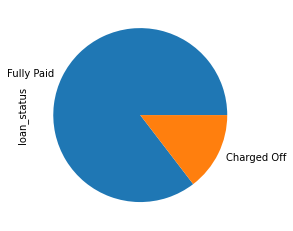

In [18]:
#confirm the loan status
ds['loan_status'].value_counts().plot.pie()
plt.show()

# <a id='1'>1.Uni-Variate Analysis</a>

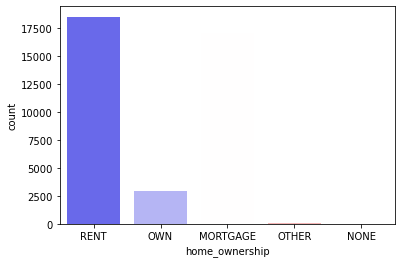

In [19]:
ds.home_ownership.value_counts()
sns.countplot(x="home_ownership", data=ds, palette="bwr")
plt.show()

**Observations**

 People chose loans in order to pay the rent

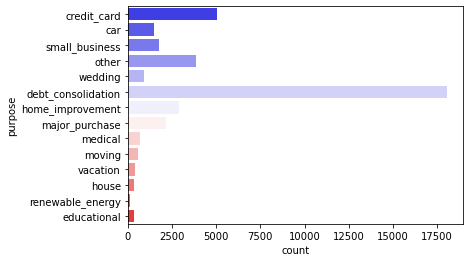

In [20]:
ds.purpose.value_counts()
#plt.figure(figsize=[150,100])
#plt.rcParams.update({'font.size': 20})
sns.countplot(y="purpose", data=ds, palette="bwr")
plt.show()

**Observations**

The purpose of the loan people will take is because of credit card as debt_conslidation include may other credits


**Handling Outliers**

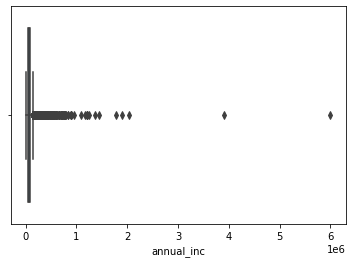

In [21]:
ds.annual_inc.describe()
sns.boxplot(ds['annual_inc'])
plt.show()

In [22]:
quantile_info = ds.annual_inc.quantile([0.25, 0.75,0.95])
quantile_info

0.25     40000.0
0.75     82000.0
0.95    140004.0
Name: annual_inc, dtype: float64

In [23]:
annual_inc_95Percentile = ds['annual_inc'].quantile(0.95)
ds = ds[ds.annual_inc <= annual_inc_95Percentile]

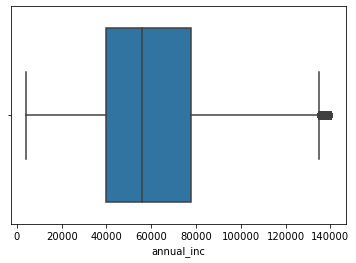

In [24]:
sns.boxplot(ds['annual_inc'])
plt.show()

***Segemented UniVaraite Analysis for already defaulted loans i.e., getting values for charged off loans and arraging per category***

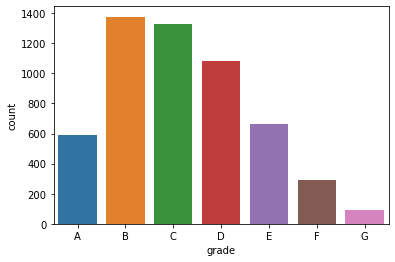

In [25]:
sns.countplot(x = 'grade', data = ds[ds.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

**Observations**
Grade B has more percentage of defauluting the loan


In [26]:
ds.sub_grade.head

<bound method NDFrame.head of 0        B2
1        C4
2        C5
3        C1
5        A4
         ..
39711    B1
39712    A4
39713    C1
39714    A4
39716    E2
Name: sub_grade, Length: 36654, dtype: object>

In [27]:
#Remove preceeding grade values from Subgrade column
ds.sub_grade = pd.to_numeric(ds.sub_grade.apply(lambda x : x[-1]))
ds.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

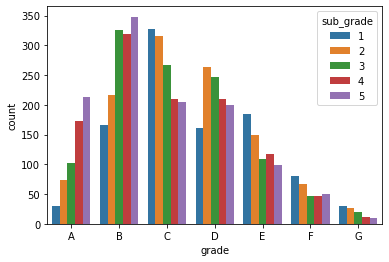

In [29]:
fig, ax = plt.subplots()
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = ds[ds.loan_status == 'Charged Off'])
plt.show()

**Analyzing purpose**